# Unsupervised Learning


Anton Akusok

<anton.akusok@arcada.fi>

Slack: `@Anton Akusok`

# Unsupervised learning transforms data in a better format  
# for humans or machines to understand

### 1. Preprocessing / Data Normalization

Arranges data numbers in a nice way for Machine Learning methods to use.  
Fixes all kinds of problems that real data has; methods work properly on normalized data.

### 2. Decomposition / Dimensionality Reduction

Selects useful features in the data, or constructs brand new useful features.  
Good for humans to visualize datasets, and for machines to focus on important parts.

### 3. Clustering

Arranges data samples into similar groups. Great insights for humans on what's inside the data.  
Unfortunately produces millions of possible results with no way to find the "perfect" one.

### 4. Outlier Detection

Find errors or very different samples in data.  
Both are equally bad for machines, as models will produce rubbish predictions on them.  

Sets aside "weird" data to be checked manually in real applications.

# 1. Preprocessing / Data Normalization  
2. Decomposition / Dimensionality Reduction  
3. Clustering  
4. Outlier Detection

# Algorithms have certain expectations of data:

## - Extreme values don't exist

Data cannot come in like: 3, 4, 2, 1, 5, **1.000.000.000**.  
An extreme value will screw algorithms internally in any multiplication, addition, computing an average, weight update, etc.

Mathematically algorithms are tailored to work on **normally distributed** or _Gaussian_ data, a bell-shaped distribution.  
A **uniform** distribution works great in practice, and _restricted range_ values are fine.

## Normal distribution - excellent

In [1]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
figsize = [18, 4]

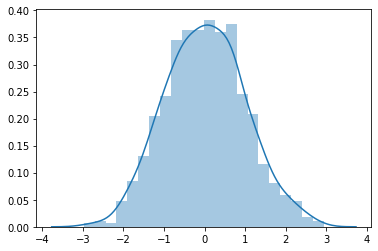

In [2]:
sns.distplot(np.random.normal(size=1000))

## Uniform distribution - excellent

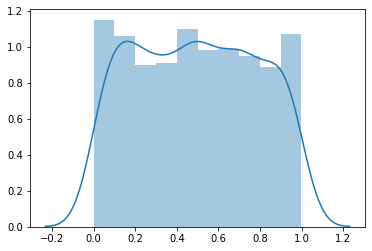

In [3]:
sns.distplot(np.random.uniform(size=1000))

## Read data distributions

In [4]:
from sklearn.datasets import california_housing
import pandas as pd

In [5]:
housing_data = california_housing.fetch_california_housing()
names = housing_data['feature_names']
X = housing_data['data']

## Extreme values (outliers)

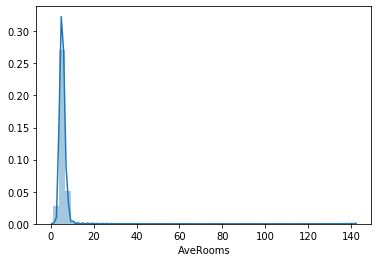

In [6]:
i = 2
sns.distplot(pd.Series(X[:,i], name=names[i]))

## Skewed distribution - most samples concentrated in a small area

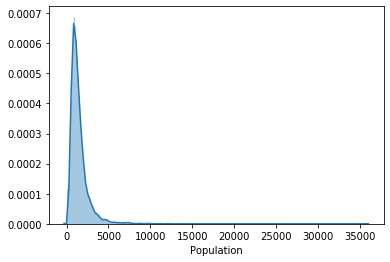

In [7]:
i = 4
sns.distplot(pd.Series(X[:,i], name=names[i]), bins=300)

    - Extreme values don't exist
## - Feature values must have the same scale

Numerical values in data give an importance of that particula feature at a particular sample.

Say if *Age* feature has values in `5...100` and *Salary* feature in `500...10,000`, then *Salary* is 100x times as important as *Age* for an algorithm. Features with large values cause problems in addition, making features with small values irrelevant.

    - Extreme values don't exist
    - Feature values must have the same scale
## - Features must be useful / relevant

Useless, noisy or irrelevant features confuse algorithms, especially when the amount of data is small.  
They accidentally coinside with predictions, tricking algorithm in believing they are important - then ruining predictive performance. The effect grows stronger with larger number of irrelevant features, and with less training data samples.

Algorithms may learn to ignore useless features, but removing them from data is always a better approach.

# Tools of Data Normalization

`Scikit-Learn` offers many tools for data normalization, that solve the aforementioned possible problems.

Let's evaluate their effect on California Housing Price dataset, with a simple linear predictive model.

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
Xt, Xs, Yt, Ys = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import RidgeCV

model = RidgeCV().fit(Xt, Yt)
model.score(Xs, Ys) * 100

66.64667045354608

## StandardScaler and RobustScaler

`StandardScaler` gives the same scale to all feature values.  
`RobustScaler` is the same, but is robust to outliers.

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sts = StandardScaler().fit(Xt)
rts = RobustScaler().fit(Xt)

In [11]:
i = 0
data_original = pd.Series(Xs[:,i], name=names[i])
data_sts = pd.Series(sts.transform(Xs)[:,i], name=names[i] + " \n StandardScaler")
data_rts = pd.Series(rts.transform(Xs)[:,i], name=names[i] + " \n RobustScaler")

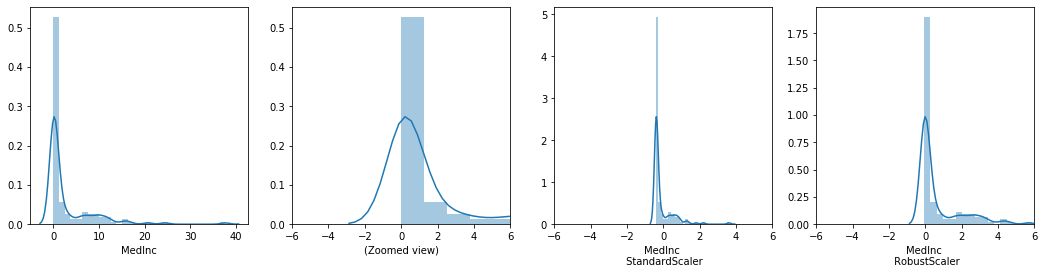

In [12]:
matplotlib.rcParams['figure.figsize'] = figsize
fig, ax = plt.subplots(1,4)
sns.distplot(data_original, ax=ax[0])
sns.distplot(data_original, ax=ax[1], axlabel="(Zoomed view)")
sns.distplot(data_sts, ax=ax[2])
sns.distplot(data_rts, ax=ax[3])
[axis.set_xlim([-6, 6]) for axis in ax[1:]]
plt.show()

In [13]:
model = RidgeCV().fit(Xt, Yt)
model.score(Xs, Ys) * 100

66.64667045354608

In [14]:
model = RidgeCV().fit(sts.transform(Xt), Yt)
model.score(sts.transform(Xs), Ys) * 100

67.23875104407504

In [15]:
model = RidgeCV().fit(rts.transform(Xt), Yt)
model.score(rts.transform(Xs), Ys) * 100

66.92914113030815

## QuantileTransformer and PowerTransformer

`QuantileTransformer` fits data to uniform or Gaussian distribution. Very detailed fit, can overfit to training data.  
`PowerTransformer` kinda same, different internal method with less parameters - suits better for small datasets.

In [16]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
qts = QuantileTransformer(output_distribution="normal").fit(Xt)
pts = PowerTransformer().fit(Xt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (379). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [17]:
i = 0
data_original = pd.Series(Xs[:,i], name=names[i])
data_qt = pd.Series(qts.transform(Xs)[:,i], name=names[i] + " \n QuantileTransformer")
data_pt = pd.Series(pts.transform(Xs)[:,i], name=names[i] + " \n PowerTransformer")

[(-6, 6), (-6, 6), (-6, 6)]

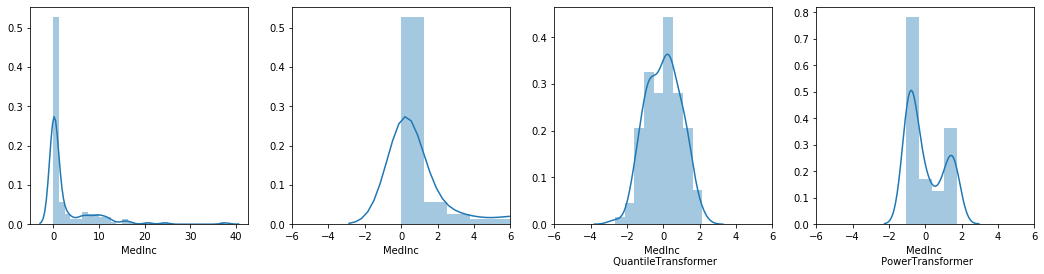

In [18]:
matplotlib.rcParams['figure.figsize'] = figsize
fig, ax = plt.subplots(1,4)
sns.distplot(data_original, ax=ax[0])
sns.distplot(data_original, ax=ax[1])
sns.distplot(data_qt, ax=ax[2])
sns.distplot(data_pt, ax=ax[3])
[axis.set_xlim([-6, 6]) for axis in ax[1:]]

In [19]:
model = RidgeCV().fit(Xt, Yt)
model.score(Xs, Ys) * 100

66.64667045354608

In [20]:
model = RidgeCV().fit(qts.transform(Xt), Yt)
model.score(qts.transform(Xs), Ys) * 100

66.50519091289407

In [21]:
model = RidgeCV().fit(pts.transform(Xt), Yt)
model.score(pts.transform(Xs), Ys) * 100

74.1355135164556

## OrdinalEncoder, OneHotEncoder, Binarizer

Transform categorical data correctly for Machine Learning methods:

- Each category is a separate feature with 0 or 1 values
- <span style="color:red">**Never use integers 1,2,3,4... as categories.**</span>

Assigning `Anton=1` and `Leonardo=2` is not categorical data. It means `Leonardo` is twice as much as `Anton`!

Correct way is `Anton = [1, 0]` and `Leonardo = [0, 1]`, that makes us equally independent in a mathematical way.  
For a class of 50 students we will need 50 features, but this is how it works.

# Heavy-tail data distributions

`QuantileTransformer` and `PowerTransformer` can normalize data from heavy-tail distribution.  
But what is a **heavy-tail distribution**?

**Heavy-tail distribution** is a kind of data that arise naturally in a multitude of places - salaries, friends count on social networks, travel distance to work, etc.  
Any feature that we talk about as "twice more" and "10% less", rather than "2 more" or "30 less", is likely to have a heavy-tail distribution. Actually it is normally distributed - with values `X` printed on a logarithmic scale.

Heavy-tail distribution gives algorithms these problems:
- Extreme values exist, and they are pretty common
- "Mean" value is meaningless
- Most samples are crampled together in a small area
- Same deltas in value have different meaning in different parts of data

Example heavy-tail data - Finnish salaries:

![salaries](img/salaries.gif)

1. Preprocessing / Data Normalization  
# 2. Decomposition / Dimensionality Reduction  
3. Clustering  
4. Outlier Detection

Data has many features (variables, signals). They can be useful, useless (for our problem), or random noise. 

***Idea:*** Replacing our data by a small number of useful features will make any methods work better.

The task of dimensionality reduction:

1. Take only the important components (an impossible task)
2. Make good enough components
     1. Find a good ***number*** of components that is small but describes data well
     2. ***Compute*** this number of good components, or...
     3. ***Select*** this number of best original components

### Hands-on: the bicycle sharing dataset

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius, divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius, divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [22]:
import pandas as pd
import numpy as np
from matplotlib import cm, pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [23]:
X_df = pd.read_csv("data/day.csv", index_col='instant')
X_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
del X_df['dteday']
del X_df['casual']
del X_df['registered']
del X_df['cnt']

# Principal Component Analysis (PCA)

The "linear model" of dimensionality reduction.

Best possible solution exist, and computes fast.

***Cons:***
* Features must have same scale
* Continuous numbers only!
* Forces absolutely independent components (unrealistic assumption)

In [25]:
from sklearn.decomposition import PCA

### categorical non-continuous numbers...

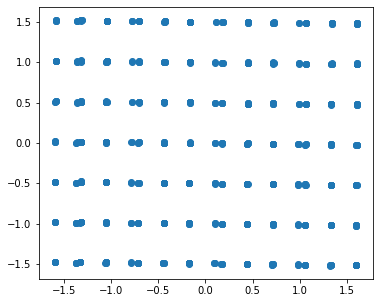

In [26]:
matplotlib.rcParams['figure.figsize'] = [6, 5]
pca = PCA(n_components=2, whiten=True)
Z = pca.fit_transform(X_df)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

Checking contents of the two (principal) components

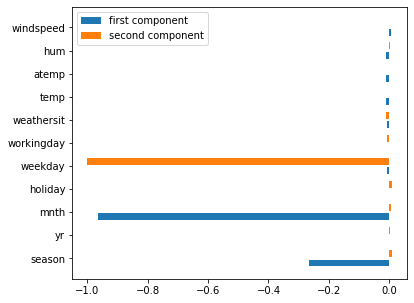

In [27]:
plt.barh(np.arange(11)-0.2, pca.components_[0], height=0.3, label='first component')
plt.barh(np.arange(11)+0.2, pca.components_[1], height=0.3, label='second component')
plt.yticks(np.arange(11), X_df.columns)
plt.legend()
plt.show()

### only continuous numbers...

In [28]:
X_df2 = X_df[['temp', 'atemp', 'windspeed']]
X_df2.head(3)

,temp,atemp,windspeed
instant,,,
1,0.344167,0.363625,0.160446
2,0.363478,0.353739,0.248539
3,0.196364,0.189405,0.248309


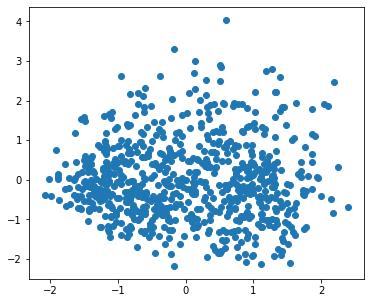

In [29]:
pca2 = PCA(n_components=2, whiten=True)
Z = pca2.fit_transform(X_df2)
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

Check components content

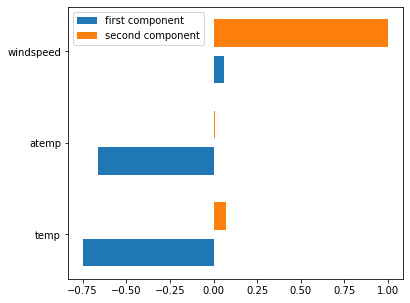

In [30]:
plt.barh(np.arange(3)-0.2, pca2.components_[0], height=0.3, label='first component')
plt.barh(np.arange(3)+0.2, pca2.components_[1], height=0.3, label='second component')
plt.yticks(np.arange(3), X_df2.columns)
plt.legend()
plt.show()

## 2. Kernel PCA

Runs PCA on a new dataset, made from the original data by non-linear transformation. "Kernel trick" speeds up computations. 

**Pros**
* No strict independence requirement
* Can find non-linear components
* Better performance than PCA
* Best solution exists for a given kernel.

**Cons**
* Finding a good kernel is up to you

In [8]:
from sklearn.decomposition import KernelPCA
import pandas as pd

Radial Basis Function (RBF) kernel uses distances between data samples

In [9]:
X_df = pd.read_csv("data/day.csv", index_col='instant')
pca = KernelPCA(n_components=2, kernel="rbf")
Z = pca.fit_transform(X_df)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

ValueError: could not convert string to float: '2011-01-01'

In [7]:
X_df

NameError: name 'X_df' is not defined

Scaling the data improves kernel PCA

In [33]:
from sklearn.preprocessing import scale
X_df_prepared = scale(X_df)

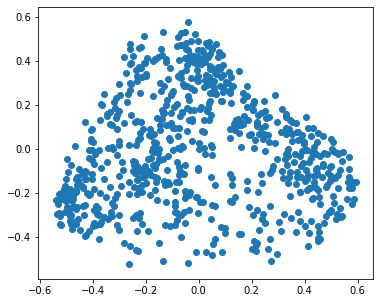

In [34]:
pca = KernelPCA(n_components=2, kernel="rbf")
Z = pca.fit_transform(X_df_prepared)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

Cosine similarity is another distance measure between two samples

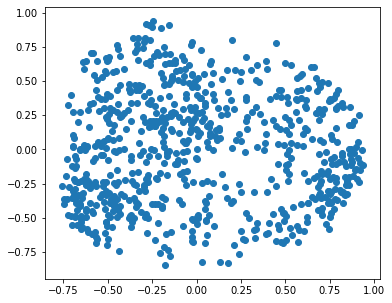

In [35]:
pca = KernelPCA(n_components=2, kernel="cosine")
Z = pca.fit_transform(X_df_prepared)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

### Analyse results of Kernel PCA

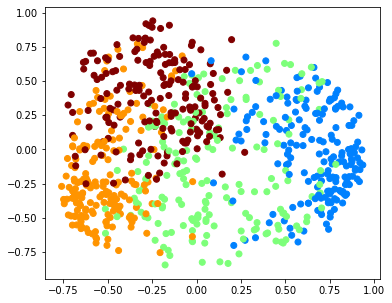

In [36]:
plt.scatter(Z[:,0], Z[:,1], c=cm.jet(X_df['season']/4))
plt.show()

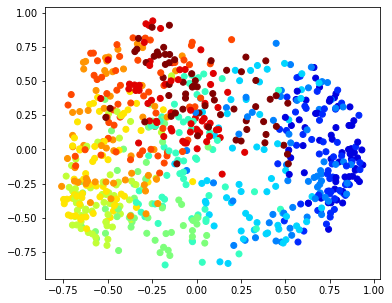

In [37]:
plt.scatter(Z[:,0], Z[:,1], c=cm.jet(X_df['mnth']/12))
plt.show()

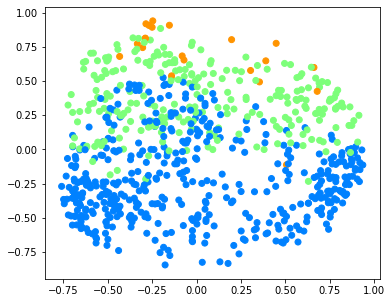

In [38]:
plt.scatter(Z[:,0], Z[:,1], c=cm.jet(X_df['weathersit']/4))
plt.show()

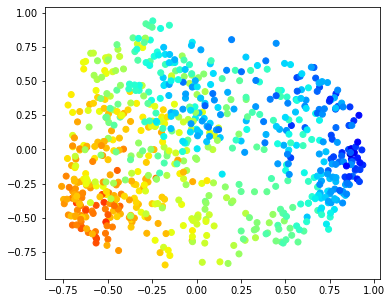

In [39]:
plt.scatter(Z[:,0], Z[:,1], c=cm.jet(X_df['temp']))
plt.show()

### And now back to bike rentals!

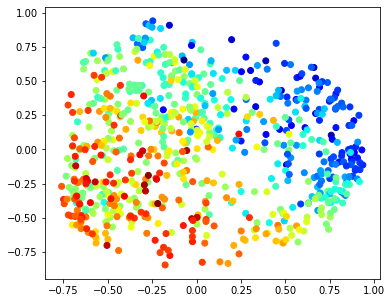

In [40]:
X_cnt = pd.read_csv("data/day.csv", index_col='instant')

plt.scatter(Z[:,0], Z[:,1], c=cm.jet(X_cnt['cnt'] / X_cnt['cnt'].max()))
plt.show()

### This figure seems like a smashed 3D object... Let's try 3D!

In [41]:
pca = KernelPCA(n_components=3, kernel="rbf")
#pca = PCA(n_components=3)
Z = pca.fit_transform(X_df_prepared)

In [42]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=Z[:,0],
    y=Z[:,1],
    z=Z[:,2],
    mode='markers',
    marker=dict(
        size=4,
        color=X_cnt['season'],
        colorscale='Jet',   # choose a colorscale
        opacity=0.8
    )
)

In [1]:
data = [trace1]
layout = go.Layout( margin={'l':0, 'r':0, 'b':0, 't':0} )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')

NameError: name 'trace1' is not defined

## Dimenstionality reduction -- Usage tips


### 1. Same transformation applies to training and new data!

Store transformation in an object like `pca()`, or write your own function.
Apply that object or function to new coming data.

## Dimenstionality reduction -- Usage tips

### 2. Inverse transformation - recover original data from predictions

Supervised methods that you run on the new features give answer in terms of the same new features.

Recover original features of your answer by inverse transformation. 

Most methods cannot do inverse transformation directly, it needs to be learned.

Same transformation for training and new data

In [44]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
scl.fit(X_df)
X_df_scaled = scl.transform(X_df)

pca = KernelPCA(n_components=3, kernel="cosine")
pca.fit(X_df_scaled)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='cosine',
          kernel_params=None, max_iter=None, n_components=3, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [45]:
# make 1 function for the whole transformation
def my_pca(X_input):
    X_scaled = scl.transform(X_input)
    X_out = pca.transform(X_scaled)
    return X_out

In [46]:
Z = my_pca(X_df)

# Z_test = my_pca(X_df_test)

Inverse transformation recovers original features of a prediction

In [47]:
pca = KernelPCA(n_components=2, kernel="cosine", fit_inverse_transform=True)
_ = pca.fit(X_df_scaled)

In [48]:
def my_pca(X_input):
    X_scaled = scl.transform(X_input)
    X_out = pca.transform(X_scaled)
    return X_out

In [49]:
def inverse_pca(X_prediction):
    X_scaled = pca.inverse_transform(X_prediction)
    X_original = scl.inverse_transform(X_scaled)
    return X_original

In [50]:
X_3_rows = X_df[:3]

Z_3_rows = my_pca(X_3_rows)

X_3_recovered = inverse_pca(Z_3_rows)

In [51]:
pd.DataFrame(data=X_3_recovered, columns=X_3_rows.columns, index=X_3_rows.index)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,
1,1.907574,0.411819,5.308974,0.041028,3.006666,0.642558,1.719945,0.283250,0.286661,0.650341,0.214872
2,1.703332,0.439237,4.653180,0.040139,3.035965,0.644748,1.629370,0.284276,0.286880,0.622361,0.221000
3,1.339663,0.521179,3.351302,0.035623,3.102944,0.658066,1.352560,0.328525,0.324412,0.552200,0.230588


In [52]:
X_3_rows

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309


1. Preprocessing / Data Normalization  
2. Decomposition / Dimensionality Reduction  
# 3. Clustering  
4. Outlier Detection

**Idea:**

Organize data samples into groups called "clusters". Samples within one group are somehow similar, and samples between the groups are somehow different.

It is like dimensionality reduction, but we reduce the number of samples instead of the number of features.

## and why it never works...

* "No labels" means you don't know what you are looking for. Little potential for making any decision.
* "The best" solution cannot be determined. Even the best number of clusters is impossible to find (except toy problems).
* Usually get a bunch of equally good solutions with different number of clusters. No idea which one to use.
* There are many clustering methods providing equally good but different solutions. No method is universally the best. Makes even harder to choose between the solutions.

Dimensionality reduction has the same problems, but they don't matter because you don't care about particular dimensions, only about the overall performance. 

In clustering, you do care about particular clusters.

## Good use cases for clustering

Assigning each data sample to one of a few clusters is useless (with rare exceptions). But there are extremely useful applications:

#### 1. Dataset size reduction by clustering with a huge number of clusters 

Can replace 10mln. dataset with 10,000 clusters; then run some slow method on those clusters.

#### 2. Label propagation if few labels are available

Cluster with a large number of clusters, in each cluster that got only one label assign that label to remaining samples

#### 3. Hidden (latent) variable analysis by soft clustering

Samples may belong to several clusters to a different extend. Useful in recommender systems, customer analysis, text topic modelling. Very similar to dimensionality reduction.

#### 4. System state discovery from data stream

User activity understanding, time to failure analysis, etc. Complex but very useful topic.

## 1. K-means or K-medoids

Default clustering method, solution is not the best - but very fast, and often converges to the same one across iterations.

Suitable especially for large number of clusters.

*ALWAYS* use **K-means++**. It improves the starting point of a method, very important for fast and good solution.

## 2. DBSCAN  (and others at scikit-learn)

Better suited for standard clustering with low number of clusters. Assign each sample to one cluster only.

No universally best method - try several and choose. Standard clustering is not useful by itself.

## 3. Gaussian Mixture Model

"Soft" clustering assigning samples to several clusters, with different confidence. Handles overlapping clusters, clusters of different size and density. Powerful method, slow solution.

Useful for detecting the underlying *components* that created that dataset. Applicabel to market research, customer segmentation, recommender systems, anomaly detection.

#### Any other soft clustering methods will work just as well

## 4. Hidden Markov Model

Works on timeseries that describes a system switching between states. For example, accelerometer in mobile phone of a person doing exercises: running, jumping, cycling, standing and drinking water, running again, ...

Finds clusters for different activities, and probabilities of switching between activities.

Most complicated method.

## Demo: K-means

In [53]:
X_df = pd.read_csv("data/day.csv", index_col='instant')

del X_df['dteday']
del X_df['casual']
del X_df['registered']
del X_df['cnt']

X_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [54]:
from sklearn.cluster import k_means

In [55]:
C, J, cost = k_means(X_df, n_clusters=12)

<BarContainer object of 12 artists>

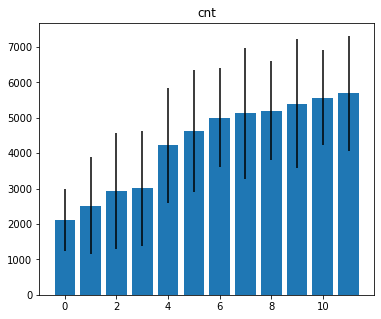

In [56]:
p = "cnt"
means = [np.mean(X_cnt[p][J == i]) for i in range(J.max()+1)]
stds = [np.std(X_cnt[p][J == i]) for i in range(J.max()+1)]

idx = np.argsort(means)
means = np.array(means)[idx]
stds = np.array(stds)[idx]

plt.title(p)
plt.bar(range(J.max()+1), means, yerr=stds)

In [57]:
marker = {"size":4, "color":J, "colorscale":"Jet", "opacity":0.8}
data = [go.Scatter3d(x=Z[:,0], y=Z[:,1], z=Z[:,2], mode='markers', marker=marker)]
layout = go.Layout(margin={'l':0, 'r':0, 'b':0, 't':0})

In [58]:
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')

## Demo: Hidden Markov Model

In [59]:
!pip install -y hmmlearn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [60]:
from hmmlearn.hmm import GaussianHMM

ModuleNotFoundError: No module named 'hmmlearn'

In [ ]:
mm = GaussianHMM(n_components=12)
mm.fit(X_df)
J = mm.predict(X_df)

In [ ]:
p = "cnt"
means = [np.mean(X_cnt[p][J == i]) for i in range(J.max()+1)]
stds = [np.std(X_cnt[p][J == i]) for i in range(J.max()+1)]

#idx = np.argsort(means)
#means = np.array(means)[idx]
#stds = np.array(stds)[idx]

plt.title(p)
plt.bar(range(J.max()+1), means, yerr=stds)

In [ ]:
marker = {"size":4, "color":J, "colorscale":"Jet", "opacity":0.8}
data = [go.Scatter3d(x=Z[:,0], y=Z[:,1], z=Z[:,2], mode='markers', marker=marker)]
layout = go.Layout(margin={'l':0, 'r':0, 'b':0, 't':0})

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')

1. Preprocessing / Data Normalization  
2. Decomposition / Dimensionality Reduction  
3. Clustering  
# 4. Outlier Detection

No course book chapter, check Scikit-Learn's webpage: 

<https://scikit-learn.org/stable/modules/outlier_detection.html>

![outlier](img/outlier.jpeg)

**Outliers** are **errors** or very **different samples**. 

Both are equally bad for models, because predictions on both will be rubbish.

- Best strategy is to remove outliers from the dataset, and analyse them manually.

![comparison](img/anomaly_comparison.png)

#### Local Outlier Factor
A glorified k-Nearest Neighbors method, detects outliers from average distance to *k*-closest neighbors.

#### One Class SVM
Separates data from empty areas without data (mathematically from coordinate zero). Minimizes area occupied by data samples, in a fancy high-dimensional kernel space.  
Any data samples still in these "empty areas" considered outliers.

#### Isolation Forest
Funny idea of a very **random** Random Forest that splits data randomly, and counts the number of random separations until a leaf of a decision tree has only one data sample (*isolates* that data sample).  
Normal data samples have similar neighbors and take many splits to separate. Outliers are so different that they easily separate from the remaining data with a few splits. Lenght of split chain until sample isolation is a measure of "outlierliness".

<some examples>